In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from code.company_data_pipeline import *
from code.ticker_data_pipeline import *
from code.model import Model
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

In [2]:
company_df, vocab = get_company_df_from_file()
print vocab
company_df.head()

[u'00' u'000' u'0000' ..., u'\xe9clat' u'\xe9xito' u'\xf8stergade']


,description,tfidf
ticker,,
aaap,We are an innovative radiopharmaceutical compa...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aal,"American Airlines Group Inc. (AAG), a Delaware...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aame,"Atlantic American Corporation, a Georgia corpo...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aaoi,This report contains forward-looking statement...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aaon,"AAON, Inc., a Nevada corporation, (""AAON Nevad...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [3]:
ticker_df = get_ticker_price_df_from_file()
ticker_df.head()

,aaap,aal,aaoi,aaon,aapc,aapl,aavl,aaww,abax,abcb,...,zgnx,zion,ziop,zltq,zsph,zumz,zvv,zvzzt,zxyz-a,zyne
timestamp,,,,,,,,,,,,,,,,,,,,,
1433174400,18.5,42.420,17.9850,23.645,10.2300,130.05,37.08,55.31,53.094,25.196,...,13.840,28.934,9.58,27.482,58.10,29.80,1.05,10.05,10.95,16.48
1433178000,18.5,42.260,17.7960,23.368,10.1530,129.57,36.72,55.15,52.408,25.022,...,13.720,28.515,9.34,27.210,57.91,29.74,1.05,10.05,10.95,16.48
1433181600,18.5,42.210,17.6049,23.586,10.1525,129.39,36.56,55.13,52.458,24.917,...,13.680,28.336,9.48,27.590,58.00,29.57,1.05,10.05,10.95,16.48
1433185200,18.5,42.190,17.4900,23.625,10.1520,129.23,36.24,55.38,52.538,25.027,...,13.679,28.515,9.41,28.070,57.87,29.43,1.05,10.05,10.95,16.48
1433188800,18.5,42.524,17.6800,23.823,10.1515,129.80,36.69,55.32,52.418,25.017,...,13.600,28.650,9.56,28.290,58.00,29.75,1.05,10.05,10.95,16.48


In [4]:
dif_df = diff_df(ticker_df, variance_quantile_cutoff=0.95)
dif_df.head()

,aaap,aal,aaoi,aaon,aapc,aapl,aaww,abax,abcb,abco,...,zbra,zg,zgnx,zion,ziop,zltq,zsph,zumz,zvzzt,zxyz-a
timestamp,,,,,,,,,,,,,,,,,,,,,
1433174400,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1433178000,0,-0.003772,-0.010509,-0.011715,-0.007527,-0.003691,-0.002893,-0.012920,-0.006906,0.009942,...,-0.006217,-0.009698,-0.008671,-0.014481,-0.025052,-0.009897,-0.003270,-0.002013,0,0
1433181600,0,-0.001183,-0.010738,0.009329,-0.000049,-0.001389,-0.000363,0.000954,-0.004196,-0.006369,...,0.002539,0.000354,-0.002915,-0.006277,0.014989,0.013965,0.001554,-0.005716,0,0
1433185200,0,-0.000474,-0.006527,0.001654,-0.000049,-0.001237,0.004535,0.001525,0.004415,-0.000874,...,0.002261,0.002156,-0.000073,0.006317,-0.007384,0.017398,-0.002241,-0.004735,0,0
1433188800,0,0.007917,0.010863,0.008381,-0.000049,0.004411,-0.001083,-0.002284,-0.000400,0.012054,...,0.001444,0.017703,-0.005775,0.004734,0.015940,0.007838,0.002246,0.010873,0,0


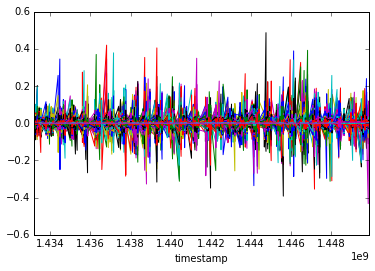

In [5]:
dif_df.plot(legend=False)

In [6]:
m = Model()
m.fit(dif_df, company_df, vocab, n_components=25, max_iter=100)
m.company_df.head()

/Users/Brian/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif Gram == 'auto':


,description,tfidf
ticker,,
aaap,We are an innovative radiopharmaceutical compa...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aal,"American Airlines Group Inc. (AAG), a Delaware...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aame,"Atlantic American Corporation, a Georgia corpo...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aaoi,This report contains forward-looking statement...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aaon,"AAON, Inc., a Nevada corporation, (""AAON Nevad...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [7]:
m.company_df.index.values

array(['aaap', 'aal', 'aame', ..., 'zsph', 'zumz', 'zyne'], dtype=object)

In [8]:
def draw_importances_graph(names, importances, title, ax):
    n = len(names)
    #ax.figure()
    ax.set_title(title, fontdict={'fontsize': 10})
    ax.bar(range(n), importances,
           color="r", align="center")
    ax.set_xticks(range(n))
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_xlim([-1, n])
    labels = ax.get_xticks()
    ax.tick_params(labelsize=20)

In [9]:
def graph_component(d):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 18))
    f.subplots_adjust(bottom=0.01)

    draw_importances_graph(d['companies_con'],
                           d['importances_con'], 
                           "Company Importances Con",
                           ax1)

    draw_importances_graph(d['words_con'],
                           d['word_importances_con'], 
                           "Word Importances Con",
                           ax2)

    draw_importances_graph(d['companies_pro'],
                           d['importances_pro'], 
                           "Company Importances Pro",
                           ax3)

    draw_importances_graph(d['words_pro'],
                           d['word_importances_pro'], 
                           "Word Importances Pro",
                           ax4)


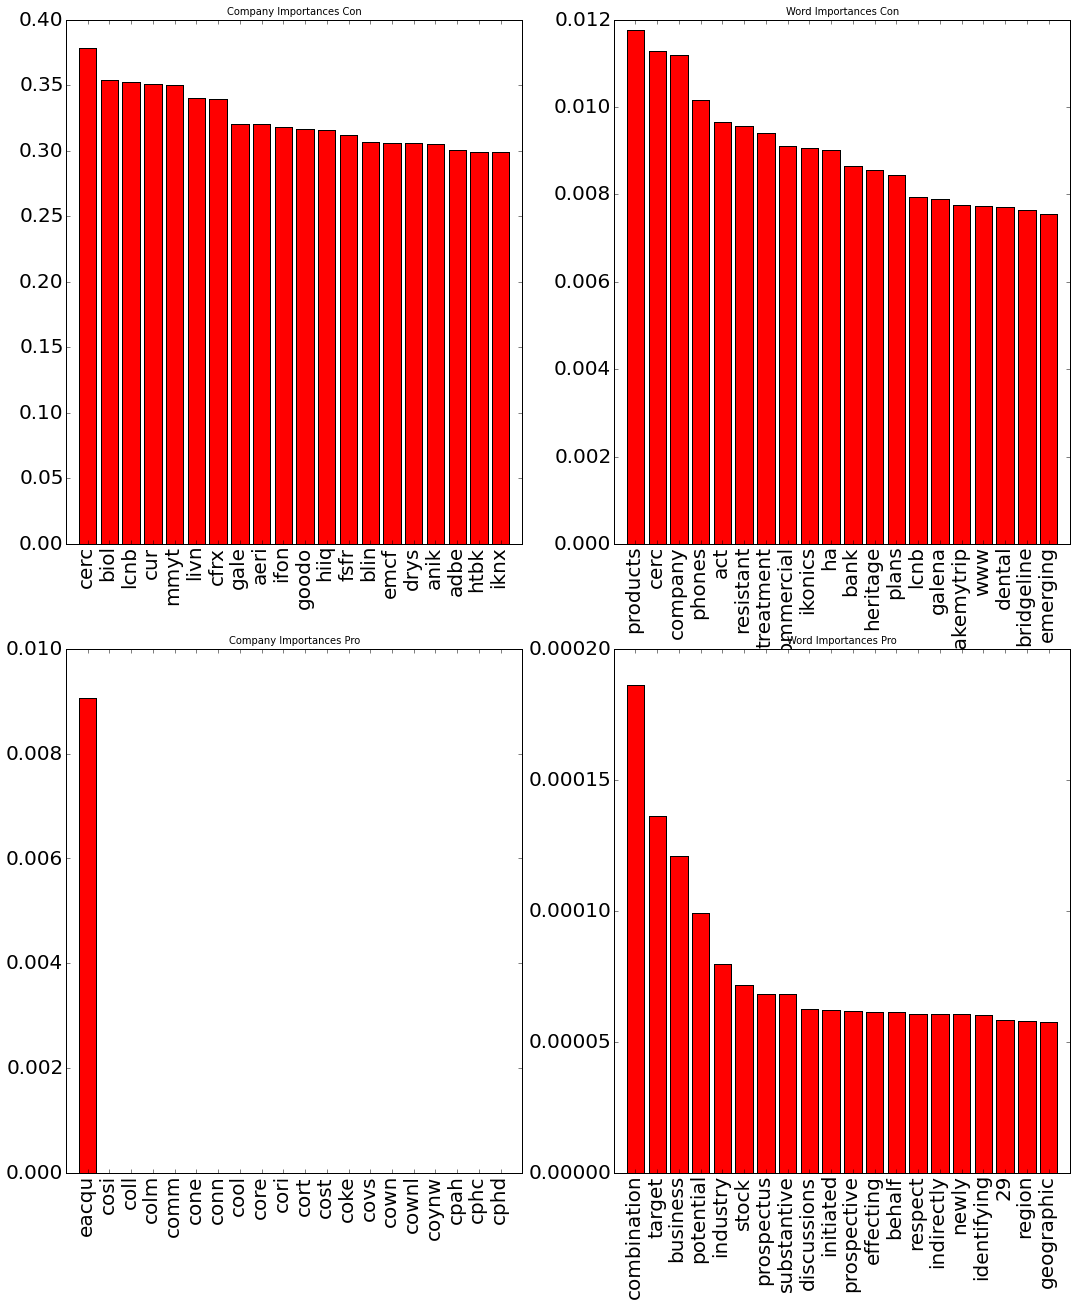

In [21]:
d = m.get_component_info(m.factorization.components_[1])
graph_component(d)

In [11]:
# We can clean up the data and get better results by finding a way to dedupe the list of
# companies.  Some are subsidiaries of the others and track very closely.  These are then 
# overrepresented in the data.

In [12]:
# Biotech and pharma seems to be overrepresented in the data.  What is going on with 
# that.  

In [13]:
# We could try daily instead of hourly.  

In [14]:
# TODO: Weight the tfidf average by company importance.  

In [15]:
# In ModelBuilder.py:
## Build the model
### Decide what stocks to use
### Subset the dataframe
### Construct model
## Pickle the model
# In Summarizer.py:
## Unpickle the model.
## Provide a way to get an hours market change from the dataset
## Given a dataframe of deltas for all the stocks
### Project onto principle componenets of model
### Calculate the error vector